In [1]:

import string
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
tf.__version__

'2.4.0'

In [3]:
DEFAULT_ALPHABET = string.digits + string.ascii_lowercase
alphabets = DEFAULT_ALPHABET
blank_index = len(alphabets)


(18, 41, 3)


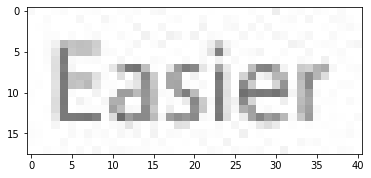

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
image_path = 'represent_data/word_40.png'
image = cv2.imread(image_path)
window_name = 'image'

print(image.shape)
#Import image
image = cv2.imread(image_path)

#Show the image with matplotlib
plt.imshow(image)
plt.show()

In [10]:
def run_tflite_model(image_path, quantization):
    input_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    input_data = cv2.resize(input_data, (200, 31))
    input_data = input_data[np.newaxis]
    input_data = np.expand_dims(input_data, 3)
    input_data = input_data.astype('float32')/255
    path = 'liteocr.tflite'
    current = os.path.abspath(os.getcwd())
    print(current)
    interpreter = tf.lite.Interpreter(model_path=path)
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    input_shape = input_details[0]['shape']
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()

    output = interpreter.get_tensor(output_details[0]['index'])
    return output

In [23]:
tflite_output = run_tflite_model(image_path, 'float16')
tflite_output[0][0][0]

/home/bhagyarsh/Desktop/ocr


9.191321e-06